# TPC1 - Física Estatística

# Atenção: 
* Não deve escrever o seu nome nem nenhum código identificador em nenhum sítio.
* Deve entregar ESTE Notebook de Jupiter
* O trabalho é individual. Podem e devem haver discussões com colegas mas o resultado entregue é individual. 
* Não deve acrescentar ou apagar nenhuma célula
* Todas as explicações devem ser claras e concisas.
* É preferível fazer menos e fazer bem que muito mal.
* O pacote numba pode diminuir o tempo de cálculo. 
* A não verificação de alguma destas regras leva ao anulamento e exclusão da prova.

In [1]:
import numpy as np
import pylab as p
from scipy.integrate import quad
from scipy.optimize import curve_fit

def cauchy(x):
    return 1/np.pi*1/(1+(x-1)**2)   

def cumul_inv(x):
    return np.tan(np.pi*x-np.pi/2) + 1

def inv(N):
    x = np.random.rand(N)
    return cumul_inv(x)

def estimador1(M,N):
    A = np.zeros(N)
    for i in range(N):
        x = inv(M)
        A[i] = np.sum(x)/M
    return A

def neumann_cont2(N,alpha):
    A = np.array([])
    x = np.linspace(-100,100,1000)
    c = max(rho(x,alpha)/cauchy(x))
    while len(A) < N:
        arr = inv(N)
        p =np.random.rand(N)
        B = arr[np.where(p<(rho(arr,alpha)/(cauchy(arr)*c)))]
        A = np.concatenate((A,B))
    return A[:N]

def rho1(x,alpha):
    return 1/(1 + np.abs(x-1)**alpha)

def rho(x,alpha):
    return 1/I[0]*1/(1 + np.abs(x-1)**alpha)

def estimador(M,N,alpha):
    S = np.zeros(N)
    for i in range(N):
        m = neumann_cont2(M,alpha)
        S[i] = np.sum(m)/M
    return S

# Exercício 1

Considere a distribuição de probabilidade de Cauchy (também conhecida por distribuição de Lorentz),$$ \rho(x)=\frac{1}{\pi}\frac{a}{a^{2}+(x-\mu)^{2}}$$
onde $a$ é uma factor de escala que pode ser fixado a=1 e \mu é o centro da distribuição que escolhemos, $\mu=1$.

1. Calcule analiticamente a função probabilidade cumulativa $C(x)$.

$ \frac{1}{\pi}arctan(x-1) - \frac{1}{2}$

2. Escreva uma função que, através do método de inversão, gera amostras aleatórias de tamanho $M$ com esta distribuição. 

In [2]:
def cumul_inv(x):
    return np.tan(np.pi*x-np.pi/2) + 1

def inv(N):
    x = np.random.rand(N)
    return cumul_inv(x)


3. Represente a distribuição de probabilidade do estimador do valor médio 
$$\overline{X}_{M}=\frac{1}{M}\sum_{i=1}^{M}x_{i}$$
para valores de M=16,64,256. 

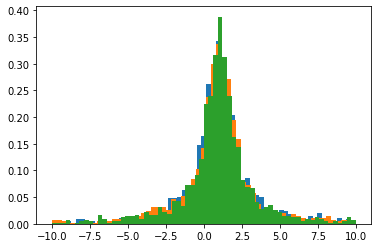

In [3]:
def estimador1(M,N):
    A = np.zeros(N)
    for i in range(N):
        x = inv(M)
        A[i] = np.sum(x)/M
    return A

N = 1500
for M in [16,64,256]:
    S = np.copy(estimador1(M,N))
    p.hist(S, bins = 'auto', range = (-10,10),density=True)
p.show()


4. O que concluí da observação dos resultados da alínea anterior? Será que o teorema do limite central se aplica? 

O teorema do limite central não se aplica porque vemos que a distribuição de probabilidade da média não tende para uma gaussiana com o aumento do número de amostras. Aliás, vemos que a distribuição mantém-se a mesma com o aumento do número do de amostras.


# Exercício 2

Considere a distribuição de probabilidadade de Pareto tipo III, 
$$\rho(x)=\frac{C(\alpha)}{a^{\alpha}+|x-\mu|^{\alpha}}$$
onde $a=1$ é um factor de escala que pode ser fixado e $\mu$ é o centro da distribuição (escolhemos $\mu=1$) .

1. Escreva uma função que usa o método de von Neumann para gerar amostras aleatórias de tamanho M. **Sugestão:** Proponha estados com a distribuição de Cauchy.

In [4]:
def neumann_cont2(N,alpha):
    A = np.array([])
    x = np.linspace(-100,100,1000)
    c = max(rho(x,alpha)/cauchy(x))
    while len(A) < N:
        arr = inv(N)
        p =np.random.rand(N)
        B = arr[np.where(p<(rho(arr,alpha)/(cauchy(arr)*c)))]
        A = np.concatenate((A,B))
    return A[:N]

2. Represente a distribuição de probabilidade do estimador 
$$\overline{X}_{M}=\frac{1}{M}\sum_{i=1}^{M}x_{i}$$
para valores de $M=16,64,256$ e para $\alpha=2.5,3$ e $3.5$.

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


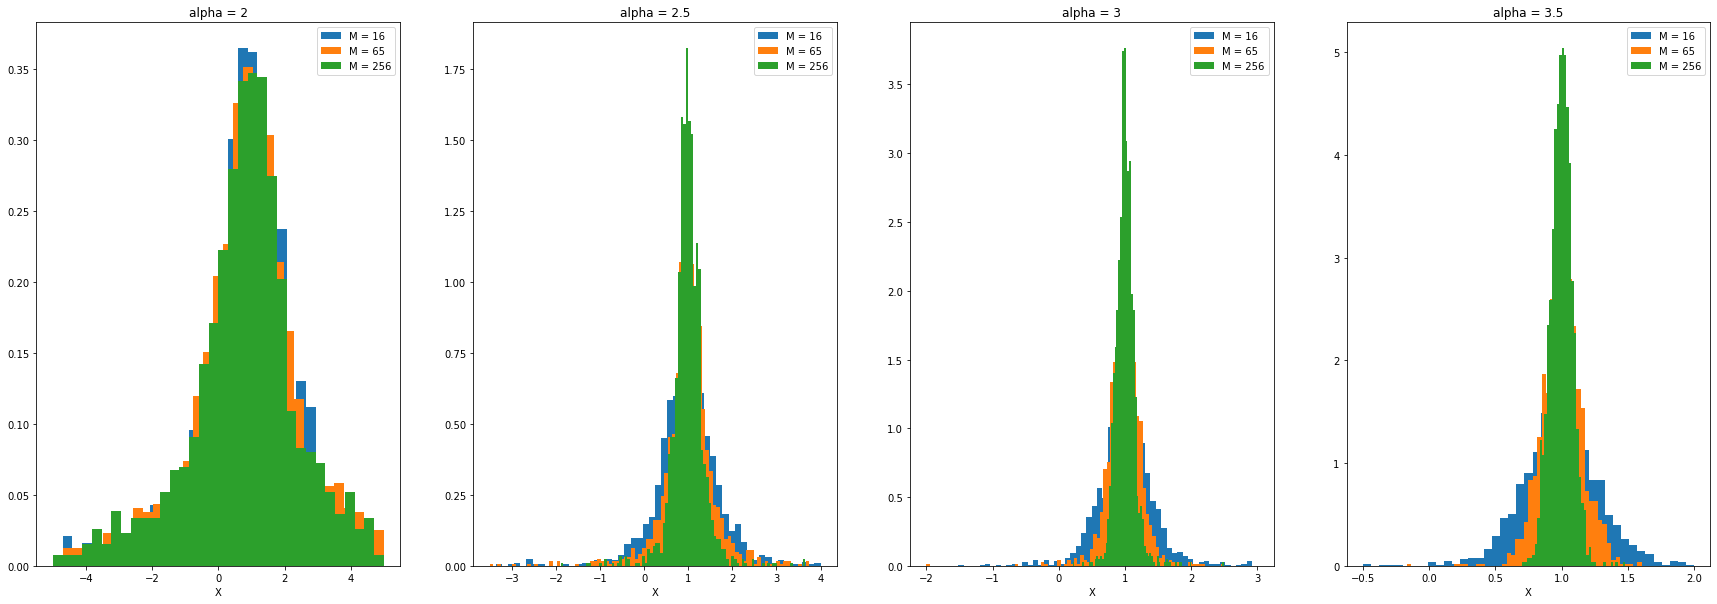

In [6]:
N = 1500
fig, axs = p.subplots(1,4, figsize = (30,10))
axs = axs.ravel()
j = -1
for alpha in [2,2.5,3,3.5]:
    j += 1
    I = quad(rho1, -10000,+10000, args=alpha)
    for M in [16,65,256]:
        S = estimador(M,N,alpha)
        axs[j].hist(S,bins = 'auto',range=(-5 + 1.5*j,5 - 1*j),label = 'M = ' + str(M))
        axs[j].set_title('alpha = ' + str(alpha))
        axs[j].set_xlabel('X')
        axs[j].legend()
p.show()

3. O que conclui da observação das distribuições geradas? Em qual/quais dela/s se verifica o teorema do limite central?

O teorema do limite central parece verificar-se no nas funções de Pareto para $ \alpha = 2.5,\, 3$ e $ 3.5 $, visto que observamos uma tendência das distribuições de probabilidade dos estimadores da média para algo que se assemelha a uma gaussiana. Todavia, a única coisa que podemos concluir com certeza é que para $\alpha = 2$ o teorema não se confirma.

# Exercício 3

Pelo teorema do limite central, sabemos que a distribuição do estimador da média de uma amostra de variáveis aleatórias tende para uma gaussiana caracterizada por,
\begin{align}
\left\langle \overline{X}_{M}\right\rangle 	& =\left\langle x\right\rangle \\
\text{var}(\overline{X}_{M}) & =\frac{\text{var}(x)}{M}.
\end{align}
1. Estude numericamente, para as distribuições discutidas nos problemas anteriores ($\alpha=2,2.5,3,3.5$), representando em função do tamanho da amostra ($M$) as sequintes quantidades,

 (a) O estimador do valor médio.

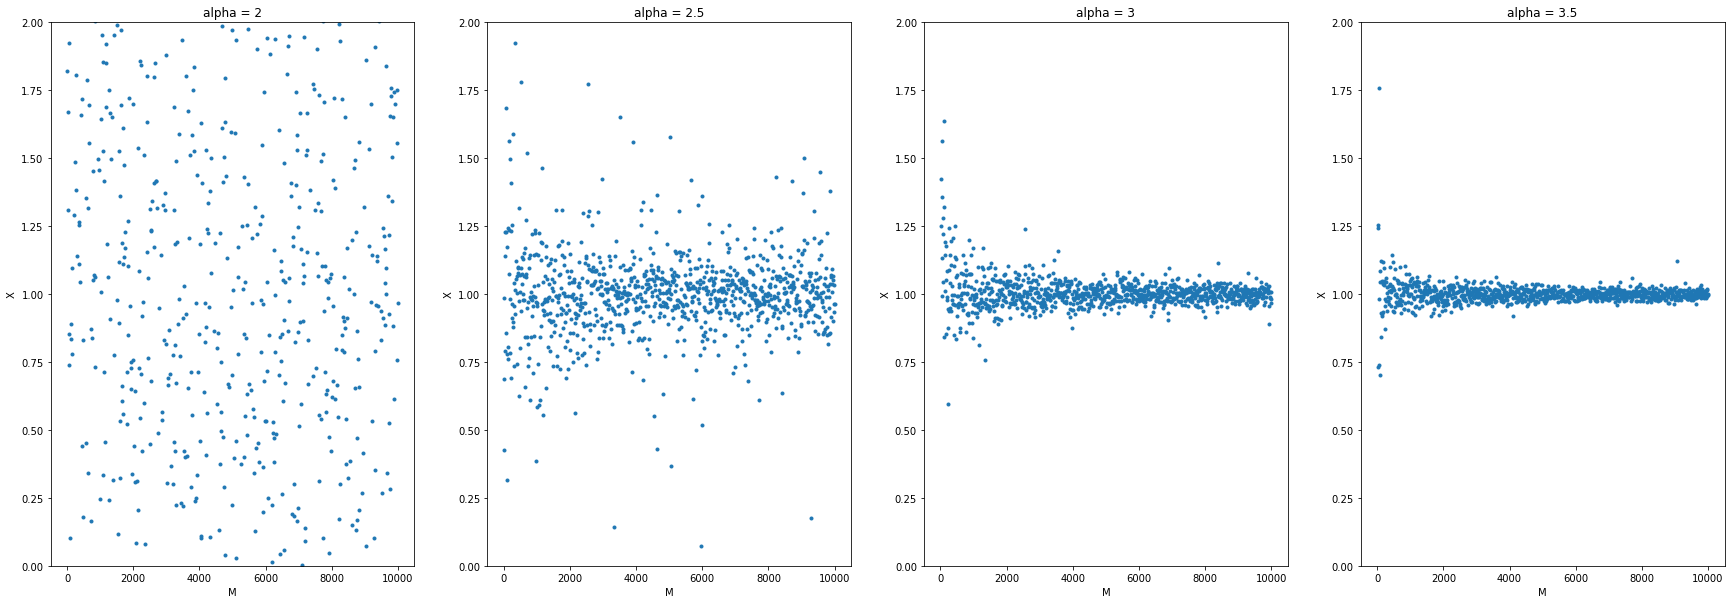

In [6]:
fig, axs = p.subplots(1,4, figsize = (30,10))
axs = axs.ravel()
Matriz = np.linspace(1,10000,1000)
def estimador_media(Matriz):
    A = np.zeros(len(Matriz))
    for i in range(len(Matriz)):
        A[i] = np.sum(neumann_cont2(int(Matriz[i]),alpha))/int(Matriz[i])
    return A
j = -1
for alpha in [2,2.5,3,3.5]:
    j += 1
    I = quad(rho1, -10000,+10000, args=alpha)
    A2 = estimador_media(Matriz)
    axs[j].plot(Matriz,A2,'.')
    axs[j].set_title('alpha = ' + str(alpha))
    axs[j].set_xlabel('M')
    axs[j].set_ylabel('X')
    axs[j].set_ylim(-0,2)
p.show()

(b) O estimador da variância.

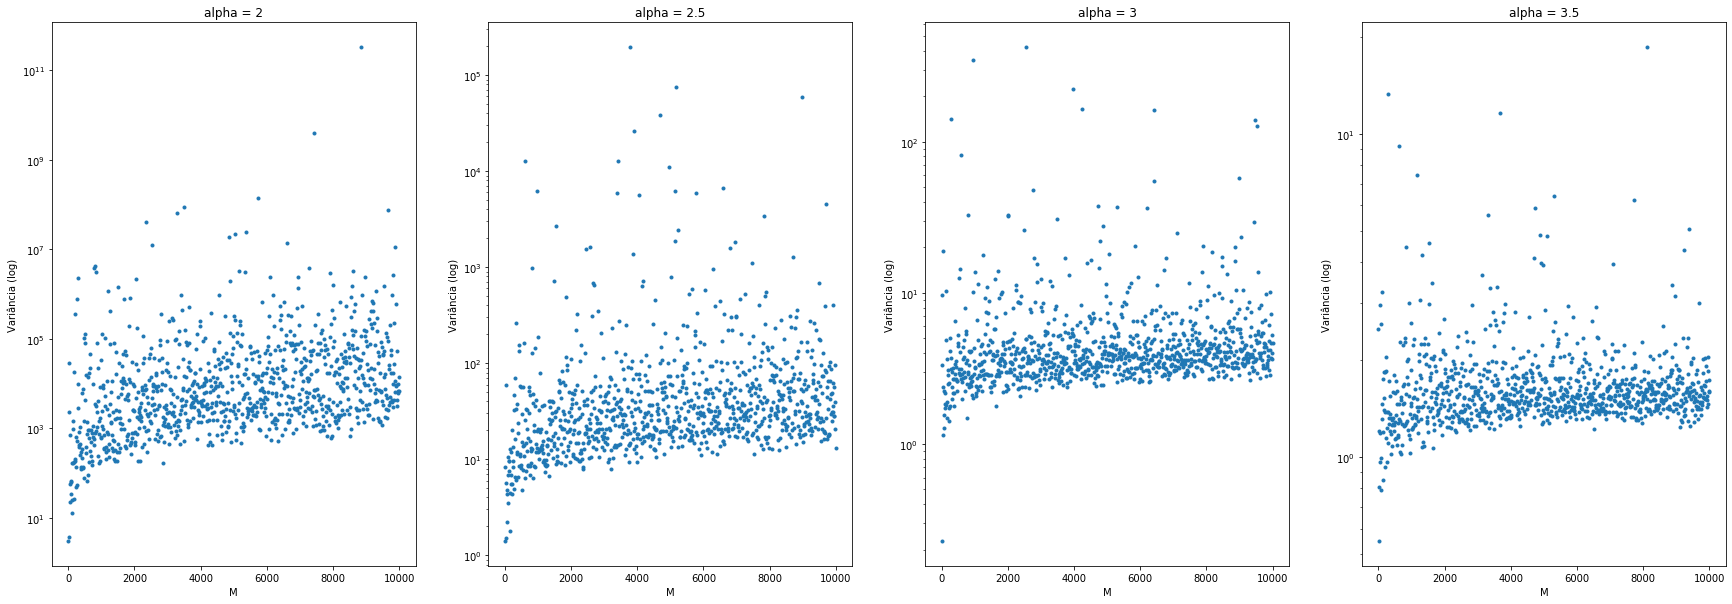

In [7]:
Matriz1 = np.linspace(2,10000,1000)
Matriz = Matriz1.astype(int)

fig, axs = p.subplots(1,4, figsize = (30,10))
axs = axs.ravel()

def estimador_variancia(M,alpha):
    variancia = np.zeros(len(M))
    for i in range(len(M)):
        x = neumann_cont2(M[i],alpha)
        media = np.sum(x)/M[i]
        S = (x - media)**2
        variancia[i] = np.sum(S)/(M[i]-1)
    return variancia

j = -1
for alpha in [2,2.5,3,3.5]:
    j += 1
    I = quad(rho1, -10000,+10000, args=alpha)
    A2 = estimador_variancia(Matriz,alpha)
    axs[j].plot(Matriz,A2,'.')
    axs[j].set_title('alpha = ' + str(alpha))
    axs[j].set_xlabel('M')
    axs[j].set_ylabel('Variância (log)')
    axs[j].set_yscale('log')
p.show() 

(c) O cumulante de terceira ordem.

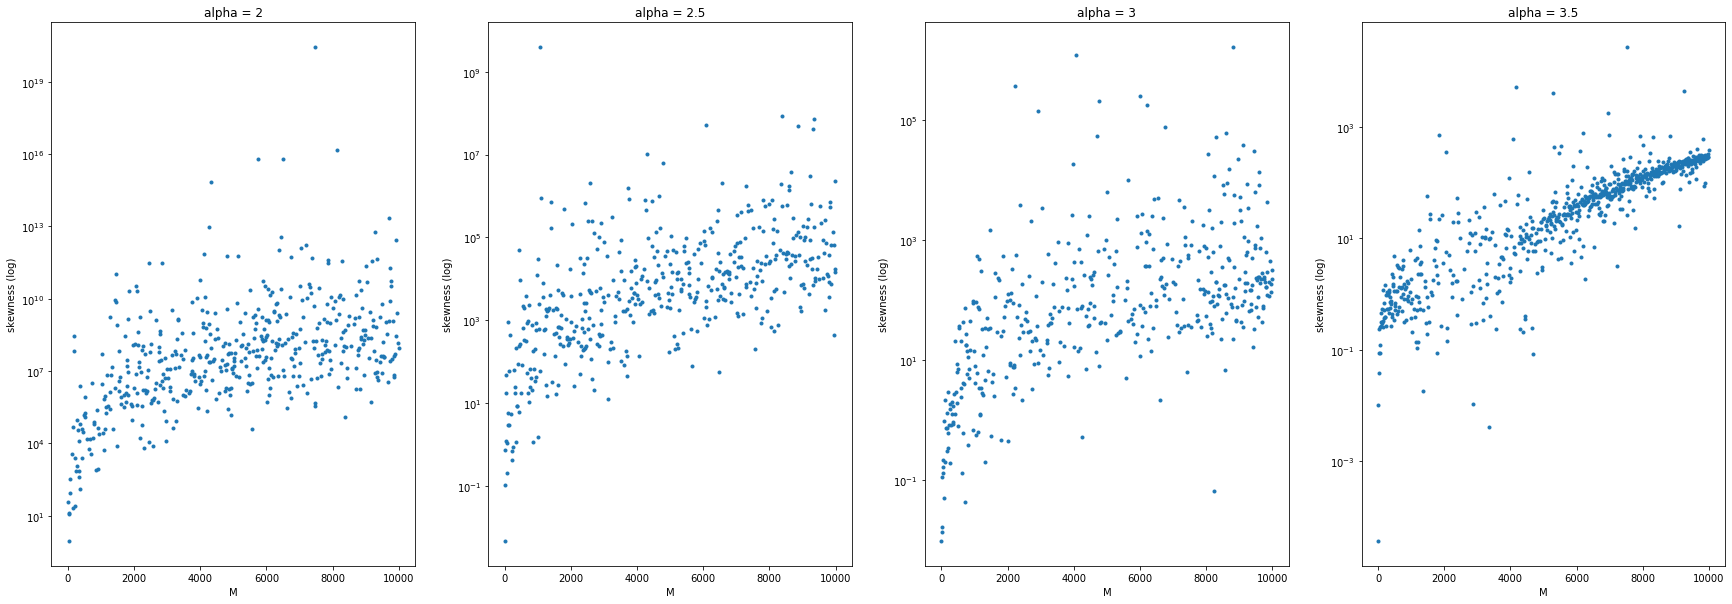

In [8]:
Matriz1 = np.linspace(2,10000,1000)
Matriz = Matriz1.astype(int)

fig, axs = p.subplots(1,4, figsize = (30,10))
axs = axs.ravel()


def estimador_skewness(M,alpha):
    skewness = np.zeros(len(M))
    for i in range(len(M)):
        x = neumann_cont2(M[i],alpha)
        m3 = np.sum(x**3)/N
        m2 = np.sum(x**2)/N
        m1 = np.sum(x)/N
        skewness[i] = m3 -3*m2*m1 + 2*m1**3
    return skewness
j = -1
for alpha in [2,2.5,3,3.5]:
    j += 1
    I = quad(rho1, -10000,+10000, args=alpha)
    A2 = estimador_skewness(Matriz,alpha)
    axs[j].plot(Matriz,A2,'.')
    axs[j].set_title('alpha = ' + str(alpha))
    axs[j].set_xlabel('M')
    axs[j].set_ylabel('skewness (log)')
    axs[j].set_yscale('log')
p.show() 

(d) O cumulante de quarta ordem.

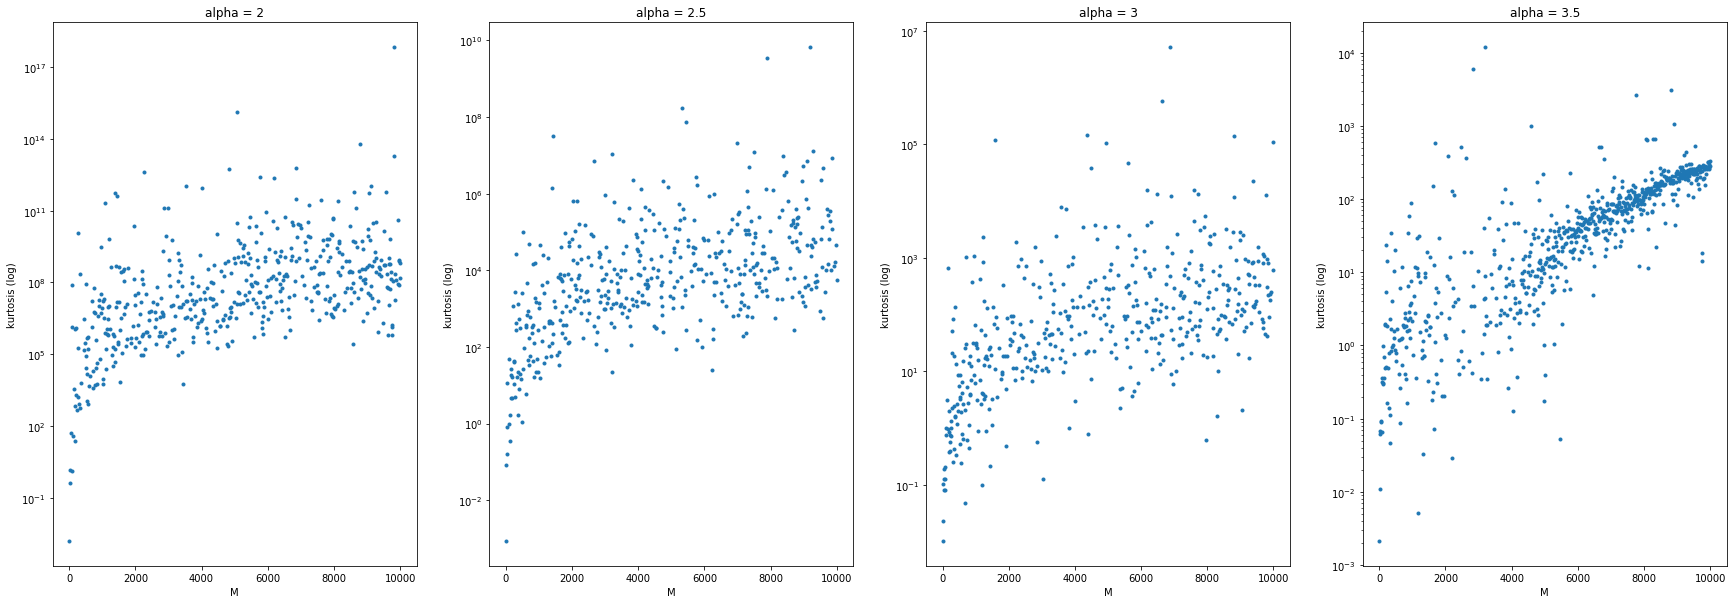

In [9]:
Matriz1 = np.linspace(2,10000,1000)
Matriz = Matriz1.astype(int)

fig, axs = p.subplots(1,4, figsize = (30,10))
axs = axs.ravel()

def estimador_kurtosis(M,alpha):
    kurtosis = np.zeros(len(M))
    for i in range(len(M)):
        x = neumann_cont2(M[i],alpha)
        m4 = np.sum(x**4)/N
        m3 = np.sum(x**3)/N
        m2 = np.sum(x**2)/N
        m1 = np.sum(x)/N
        kurtosis[i] = m4 -4*m3 -3*m2**2 +12*m2*m1**2 -6*m1**4
    return kurtosis
j = -1
for alpha in [2,2.5,3,3.5]:
    j += 1
    I = quad(rho1, -10000,+10000, args=alpha)
    A2 = estimador_skewness(Matriz,alpha)
    axs[j].plot(Matriz,A2,'.')
    axs[j].set_title('alpha = ' + str(alpha))
    axs[j].set_xlabel('M')
    axs[j].set_ylabel('kurtosis (log)')
    axs[j].set_yscale('log')
p.show() 

2. O que conclui? Compare com os resultados analíticos. Em que condições o teorema do limite central se verifica? Qual a importância, para a demonstração do teorema do limite central, da existência de momentos finitos?

Concluimos que todas as distribuições analisadas têm pelo menos um cumulante que diverge, o que não contradiz o teorema do limite central. De facto, o teorema é demonstrado assumindo que os momentos (e, consequentemente, os cumulantes) são finitos, porém, o não serem finitos não implica que a distribuição não siga o teorema do limite central. Porém, é sempre preciso uma média e variância bem definida. No caso da média, vemos que é bem definida para todos os casos. Para a variância, que é constituida por $ <x^{2}> - <x>^{2} $, podemos olhar para a definição de $<x^{2}> = \int_{-\infty}^{+\infty} \frac{x^{2}}{1+(x-1)^{\alpha}} $. Este integral apenas converge para $\alpha > 3 $, logo, podemos afirmar que para os 3 primeiros casos, o teorema de limite central não se aplica. Já para o último caso, não podemos afirmar com certeza se se aplica ou não, apesar de parecer que sim. 

# Exercício 4

Na demonstração do teorema do limite central obtivemos o resultado exacto,
\begin{align}
\phi_{N}(k)	& =\int_{-\infty}^{+\infty}dxe^{-ikX}\rho_{N}(X) \\
	        & =\left(\int_{-\infty}^{+\infty}dxe^{-ikx}\rho(x)\right)^{N}
 \end{align}
quando $X=\sum_{i=1}^{N}x_{i}$. Normalmente expandimos a exponencial em séries de Taylor dando origem à expansão de cumulantes,
$$\phi_{N}(k)=e^{N\log\left(\left\langle e^{-ikx}\right\rangle \right)}$$ 
concluímos que para as distribuições analisadas neste TPC, a partir de determinada ordem, os cumulantes divergem.

1. Escreva uma função capaz de avaliar $\phi(k)$ usando amostragem por importância (ver actividades computacionais).


(a) Represente a parte real e imaginária da função $\phi_{N}(k)$ para $N=16,64,256,1024$.

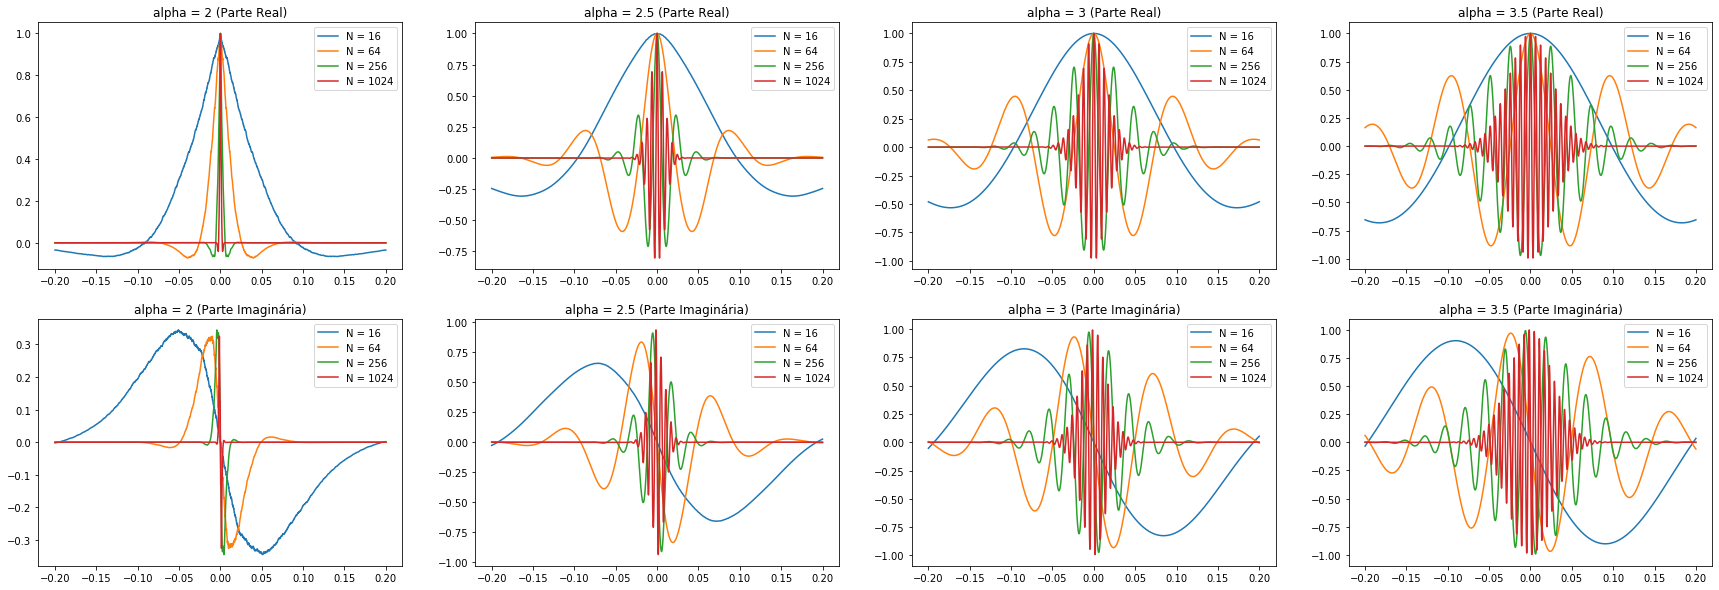

In [10]:
fig, axs = p.subplots(2,4, figsize = (30,10))
axs = axs.ravel()

k = np.linspace(-1,1,10000)

def soma(M,k,N = 1):
    x = neumann_cont2(M,alpha)
    S = np.exp(-1j*np.outer(k,x))
    A = np.sum(S, axis = 1)/M
    return A**N
M = 10000
j = -1
for alpha in [2,2.5,3,3.5]:
    j += 1
    for N in [16,64,256,1024]:
        I = quad(rho1, -10000,+10000, args=alpha)
        k = np.linspace(-0.2,0.2,10000)
        phi = soma(M,k,N)
        axs[j].plot(k,np.real(phi), label = 'N = ' + str(N))
        axs[j].set_title('alpha = ' + str(alpha) + ' (Parte Real)')
        axs[j].legend()
        axs[j + 4].plot(k,np.imag(phi), label = 'N = ' + str(N))
        axs[j + 4].set_title('alpha = ' + str(alpha) + ' (Parte Imaginária)')
        axs[j + 4].legend()
p.show()

(b) Descreva o que observou na alínea anterior?

Vemos que, com o aumento do N, há um estreitamento do sinal.

2. A distribuição de probabilidade da média é dada por
\begin{align}
\rho(x) & =\frac{N}{2\pi}\int_{-\infty}^{+\infty}dke^{ikNx}\phi_{N}(k)\\
        & =\frac{1}{2\pi}\int_{-\infty}^{+\infty}dk'e^{ik'x}\phi_{N}\left(\frac{k'}{N}\right)
        \end{align}
Sabendo que 
\begin{align}
\int_{-\infty}^{+\infty}dxe^{-ikx}\frac{1}{\pi(1+x^{2})}	& =e^{-|k|} \\
\int_{-\infty}^{+\infty}dxe^{-ikx}\frac{\sqrt{2}}{\pi(1+x^{4})}	& =e^{-|k|/\sqrt{2}}\left(\cos\left(\frac{k}{\sqrt{2}}\right)+\sin\left(\frac{|k|}{\sqrt{2}}\right)\right)
\end{align}
calcule usando amostragem por importância as distribuições para $N=16,64,256$ para $\alpha=2,2.5,3,3.5$. 

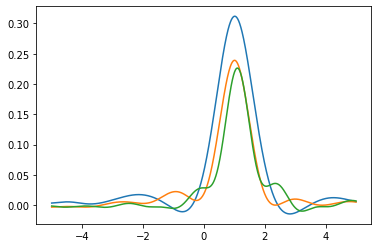

In [11]:
def rho2(k,N):
    return N/2*np.exp(-N*np.abs(k))
alpha = 2

I = quad(rho1, -10000,+10000, args=alpha)


def neumann(M,a,b,N = 1):
    A = np.array([])
    while len(A) < M:
        k = np.random.rand(M)*(b-a) + a 
        p = np.random.rand(M)
        B = k[np.where(p<rho2(k,N))]
        A = np.concatenate((A,B))
    return A[:M]

def soma(M,k,N = 1):
    x = neumann_cont2(M,alpha)
    S = np.exp(-1j*np.outer(k,x))
    A = np.sum(S, axis = 1)/M
    return A**N

M = 10000
for N in [16,64,256]:
    k = neumann(M,-30,30,N)
    phi = soma(M,k,N)
    x = np.linspace(-5,5,1000)
    S = np.exp(N*1j*np.outer(x,k))*np.ones((len(x),len(k)))*(phi/np.exp(-N*np.abs(k)/np.sqrt(2)))

    final = np.sum(S, axis = 1)*1/M/np.pi*np.sqrt(2)
    p.plot(x,np.real(final))
p.show()

3. Para cada uma das distribuições existe uma lei de transformação da variável $x=yN^{\beta}+C(N)$ de tal modo que y seja independente de N, isto é, a distribuição $\rho(y)$ 
para diferentes tamanhos é igual. Determine para cada valor de $\alpha$ essa dependência. 

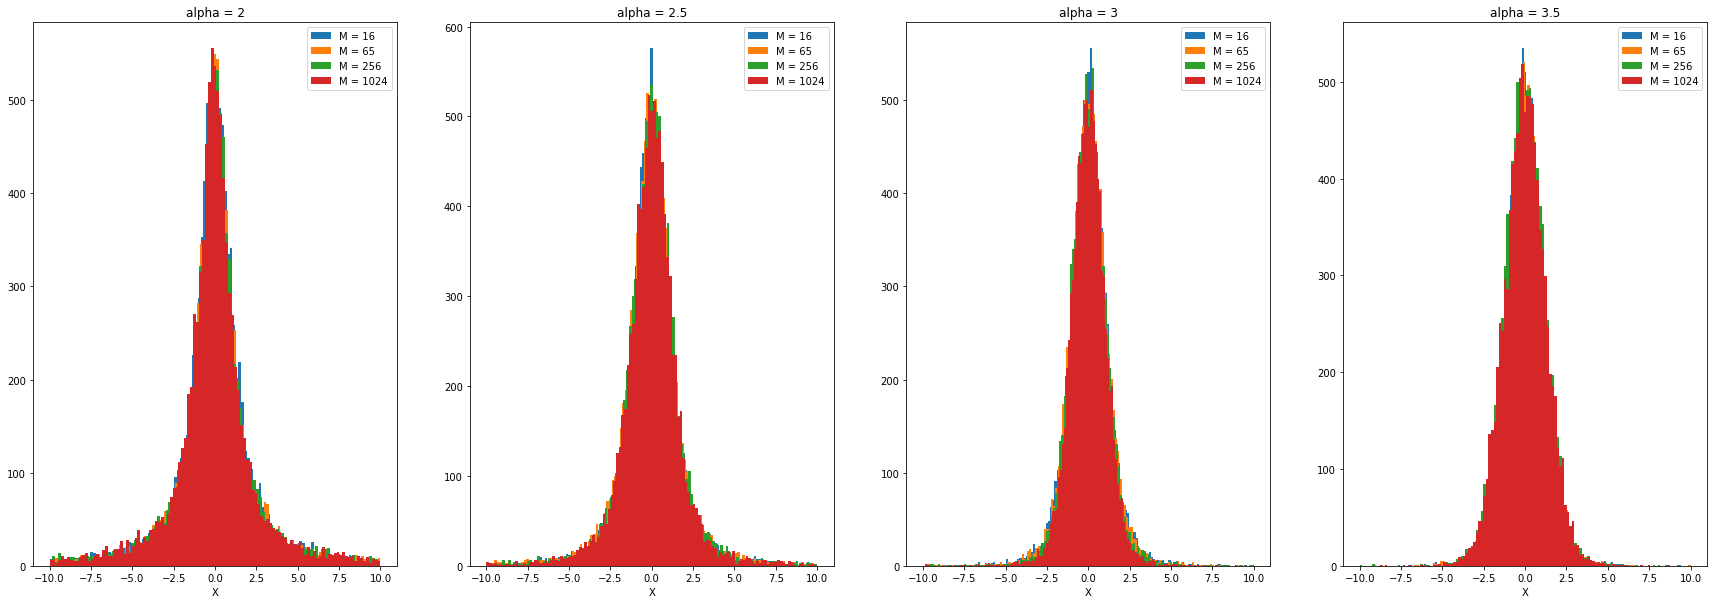

In [12]:
fig, axs = p.subplots(1,4, figsize = (30,10))
axs = axs.ravel()
N = 10000
beta = [0,0.3,0.4,0.5]
j = -1
for alpha in [2,2.5,3,3.5,]:
    j += 1
    I = quad(rho1, -10000,+10000, args=alpha)
    for M in [16,65,256,1024]:
        S = estimador(M,N,alpha)
        S = np.copy((S-1)*M**beta[j])
        axs[j].hist(S,bins = 'auto',range=(-10,10),label = 'M = ' + str(M))
        axs[j].set_title('alpha = ' + str(alpha))
        axs[j].set_xlabel('X')
        axs[j].legend()
p.show()